#**Ejercicio 1**

Partiendo de la ecuación del oscilador armonico amortiguado, notamos que representa una ecuación diferencial de segundo orden.

$$\frac{d^2x}{dt^2} + \gamma\frac{dx}{dt} + \omega^2x=0$$

Es posible reducir el orden $n$ de la ecuación a orden $1$, generando un sistema de $n$ de ecuaciones.

LLamemos $\frac{dx}{dt} = v$. De este modo, $\frac{d^2x}{dt^2}=\frac{dv}{dt}$ y obtenemos la siguiente ecuación diferencial.

$$\frac{dv}{dt}+\gamma v+\omega^2x=0$$

Notese que hemos reducido a primer orden la ecuación inicial; sin embargo, tenemos ahora una ecuación diferencial de dos variables dependientes $(x,v)$, por requerimos dos ecuaciones que podamos acoplar para solucionar el sistema.

Estas dos ecuaciones provienen directamente del cambio de variable que realizamos.

$$\frac{dx}{dt} = v$$

$$\frac{dv}{dt}=-\gamma v-\omega^2x$$

En este sistema de ecuaciones podemos notar que se encuentran involucradas todas las variables $(x,v,t)$. De esta forma, las anteriores ecuaciones toman la siguiente forma, en terminos de funciones.

$$\frac{dx}{dt} = v=g_0(x,v,t)$$

$$\frac{dv}{dt}=-\gamma -v\omega^2x=g_1(x,v,t)$$


#**Ejercicio 2**

Partimos de una ecuación diferencial de primer orden que puede ser descrita por cierta función $f$ que conocemos.

$$\tag{1}\frac{dy}{dt} = f(y(t),t)$$

Dado que con este metodo tratamos de resolver un *Problema de Valor Inicial*, conocemos las condiciones iniciales $(t_0,y(t_0))$

Definimos un intervalo $t_0 < t < t_f$ en el cual queremos solucionar la ecuación diferencial, y por tanto definimos el tamaño de paso $h=\frac{t_f-t_0}{n}$.

Recordando algunas nociones del calculo, notamos que $f(y(t),t)$ corresponde al crecimiento infinitesimal de $y$, por tanto podemos conocer (mediante aproximación lineal) el valor de $y(t_0+h)$

$$y(t_0+h)\approx y(t_0)+hf(y(t),t)$$

Si quisieramos la aproximación infinitesimal, es decir, el valor real de $y(t_0+h)$ deberiamos conocer su incremento infinitesimal. Para ello haremos lo siguiente:

$$\lim_{n\to\infty}h=dt$$

El "desplazamiento" desde $y(t_0)$ hasta $y(t_0+h)$ correspondería al incremento infinitesimal $f(y(t),t)dt$ en el intervalo $[t_0,t_0+h]$.

$$y(t_0+h)-y(t_0)=\int_{t_0}^{t_0+h}f(y(t),t)dt$$

Notese que la expresión anterior es la solución a nuestra ecuación diferencial inicial $(1)$.

$$\int_{y(t_0)}^{y(t_0+h)}dy=\int_{t_0}^{t_0+h}f(y(t),t)dt$$


De este modo, el valor de $y(t_0+h)$ equivale a

$$\begin{equation}\tag{2}y(t_0+h) = y(t_0)+\int_{t_0}^{t_0+h}f(y(t),t)dt\end{equation}$$

El valor de la integral podemos resolverlo aplicando el teorema del valor medio para integrales, el cual se enuncia a continuación: 

Sea un intervalo $I=[a,b]$ en el cual se define la función $f:I\to ℝ$ continua $\forall x\in I$, entonces.

$$\exists c\in I: \int_{a}^{b}f(x)dx=(b-a)f(c)$$

En el intervalo $[t_0,t_0+h]$, teniendo a $h$ como un infinitesimal, podemos definir el valor medio como $c=t_0+\frac{h}{2}$, de este modo la integral de $(2)$ nos resulta de la siguiente forma

$$\begin{split}
\int_{t_0}^{t_0+h}f(y(t),t)dt & =(t_0+h-t_0)f\bigg(y(t_0+\frac{h}{2}),t_0+\frac{h}{2}\bigg)\\
 & =hf\bigg(y(t_0+\frac{h}{2}),t_0+\frac{h}{2}\bigg)
\end{split}\tag{3}$$

El valor de $y(t_0+\frac{h}{2})$ podemos aproximarlo mediante *Metodo de Euler* $:y_1=y_0+hf(y_0,t_0)$

$$y(t_0+\frac{h}{2})=y(t_0)+\frac{h}{2}f\bigg(y(t_0),t_0\bigg)\tag{4}$$

Introduciendo $(4)$ en $(3)$ obtenemos lo siguiente

$$hf\bigg(y(t_0)+\frac{h}{2}f(y(t_0),t_0),\hspace{0.5cm}t_0+\frac{h}{2}\bigg)$$

Llamaremos $hf\bigg(y(t_0),t_0\bigg)=\mathbb{K_1}$ por lo que nuestra expresión resulta en

$$hf\bigg(y(t_0)+\frac{\mathbb{K_1}}{2},t_0+\frac{h}{2}\bigg)\tag{5}$$

Nuestra expresion $(5)$ es aquella que llamaremos $\mathbb{K_2}$, y sustituyendo esto en la integral de $(2)$ obtenemos lo siguiente

$$y(t_0+h)=y(t_0)+\mathbb{K_2}$$

Finalmente, resumiendo todo lo obtenido, se muestran a continuaciones las expresiones para el metodo *RK2*

$$\mathbb{K_1}=hf\bigg(y(t_0),t_0\bigg)$$

$$\mathbb{K_2}=hf\bigg(y(t_0)+\frac{\mathbb{K_1}}{2},t_0+\frac{h}{2}\bigg)\tag{5}$$

$$y(t_0+h)=y(t_0)+\mathbb{K_2}$$

#**Ejercicio 3**

Con $\omega=1$ y $\gamma=0.5$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def RK4(f, y, t, dt): #Metodo Runge - Kutta de orden 4
  k1 = dt*f(y, t)
  k2 = dt*f(y + 0.5*k1, t + 0.5*dt)
  k3 = dt*f(y + 0.5*k2, t + 0.5*dt)
  k4 = dt*f(y + k3, t + dt)
  return y + (1/6)*(k1 + 2*k2 + 2*k3 + k4) 

In [ ]:
#Ecuaciones del sistema reducido a primer orden
def g0(x, v, t):
  return v

def g1(x, v, t):
  return -gamma*v - (omega**2)*x

In [ ]:
def integrador(y, t):
  x = y[0]
  v = y[1]
  dx = g0(x, v, t)
  dv = g1(x, v, t)
  return np.array([dx, dv])

In [ ]:
omega = 1 #Frecuencia Natural del Sistema
gamma = 0.5 #Coeficiente de Fricción menor que 2w

T = 2*np.pi/omega #Periodo del oscilador
dt = T/720 #Tamaño de paso de modo que se logren 0.5° de avance
t = np.arange(0, 5*T + dt, dt) #Se graficarán 5 periodos del sistema

x = np.zeros(len(t))
v = np.zeros(len(t))

#Condiciones Iniciales
x[0] = 0
v[0] = 2
y = np.array([x[0],v[0]])

#Iterativo de RK4
for i in range(len(t)-1):
  y = RK4(integrador, y, t[i], dt)
  x[i+1] = y[0]
  v[i+1] = y[1]

m = 1 #Masa del cuerpo
E = 0.5*m*(v**2) + 0.5*m*(omega**2)*(x**2) #Energia del sistema

Text(0.5, 1.0, 'Energia del Sistema')

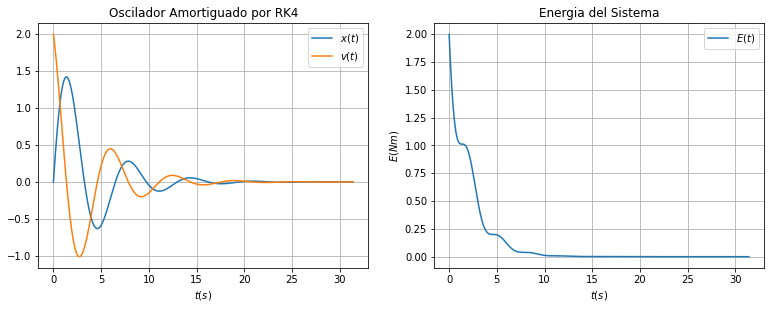

In [ ]:
fig = plt.figure(figsize = (13,4.5))
ax1 = fig.add_subplot(121)
ax1.plot(t, x, label = "$x(t)$")
ax1.plot(t, v, label = "$v(t)$")
ax1.set_xlabel("$t(s)$")
ax1.set_title("Oscilador Amortiguado por RK4")
ax1.legend()
ax1.grid()
ax2 = fig.add_subplot(122)
ax2.plot(t, E, label = "$E(t)$")
ax2.set_xlabel("$t(s)$")
ax2.set_ylabel("$E(Nm)$")
ax2.legend()
ax2.grid()
ax2.set_title("Energia del Sistema")

#**Ejercicio 4**

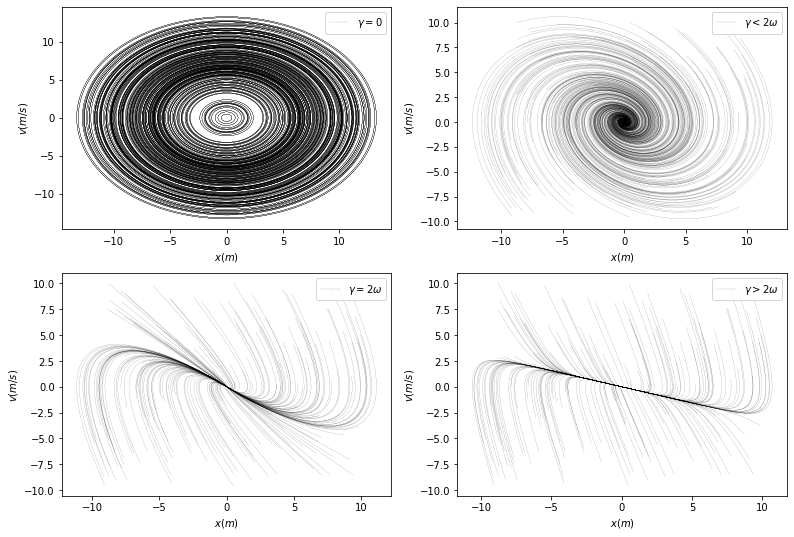

In [ ]:
#Multiples Condiciones Iniciales
x0s = np.random.uniform(-10,10,200)
v0s = np.random.uniform(-10,10,200)

omega = 1 #Frecuencia Natural fija

T = 2*np.pi/omega #Periodo del oscilador
dt = T/720 #Tamaño de paso de modo que se logren 0.5° de avance
t = np.arange(0, 5*T + dt, dt) #Se graficarán 5 periodos del sistema

gammas = np.array([0, 0.5, 2, 3.5]) #Distintos Coeficientes de Fricción
x = np.zeros(len(t))
v = np.zeros(len(t))

fig = plt.figure(figsize = (13,9))
fig.suptitle("Espacios de Fase")
ax1 = fig.add_subplot(21)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
axes = np.array([ax1, ax2, ax3, ax4])
labels = ["$\\gamma = 0$", "$\\gamma < 2\\omega$", "$\\gamma = 2\\omega$", "$\\gamma > 2\\omega$"]

for k in range(4):
  gamma = gammas[k]
  for j in range(200):
    x[0] = x0s[j]
    v[0] = v0s[j]
    y = np.array([x[0],v[0]])

    for i in range(len(t)-1):
      y = RK4(integrador, y, t[i], dt)
      x[i+1] = y[0]
      v[i+1] = y[1]

    axes[k].plot(x, v, color='k', lw=0.1)
  axes[k].set_xlabel("$x(m)$")
  axes[k].set_ylabel("$v(m/s)$")
  axes[k].legend([labels[k]])

#**Ejercicio 5**

El grafico anterior presenta todas las regiones dinamicas del oscilador armonico respectivas en cada cuadrante del grafico.

$$\gamma =0\hspace{0.5cm}\gamma < 2\omega \hspace{0.5cm}\gamma =2\hspace{0.5cm}\gamma > 2\omega$$

Cada uno de los cuadrantes muestra la evolución del sistema dadas las condiciones iniciales $(x,v)$, es decir, las curvas observadas muestran la evolución de $(x,v)$ hasta su estadío final.

En el cuadrante $1$ notamos un oscilador sin amortiguacion. Esto se refleja en las curvas circulares que mantienen el movimiento oscilatorio constante y por tanto no hay perdida de energía.

En los cuadrantes $2$, $3$ y $4$ notamos una convergencia de las curvas hacia la posición $(x =0,v=0)$, cada uno con una rapidez de convergencia distinta.

El cuadrante $2$ refleja curvas espirales, es decir que conserva la oscilación alrededor de la posición de equilibrio pero con perdida de energía gradual.

Los cuadrantes $3$ y $4$ muestran un comportamiento similar en las curvas. Para estos casos no se observa ningún comportamiento oscilante sino una decreción rapida de la velocidad y por tanto del detenimiento de la particula en su posición de equilibrio. Energeticamente esto significa un decrecimiento rapido al $0$ de energía. 

El cuadrante de amortiguamiento critico refleja la tendencia optima al detenimiento, es decir, la manera más rapida en la que la particula puede llegar a detenerse en su posición de equilibrio$

Para el caso de sobreamortiguamiento, la llegada a la posición de equilibrio se da mucho más lento que en el amortiguamiento critico pues el decremiento de la velocidad se da de forma brusca sin llegar a la posición de equilibrio. De esta forma, la fuerza restauradora sigue actuando sobre la particula hasta que llegue a la posición de equilibrio de una forma muy lenta por la poca velocidad que se conserva.



In [ ]:
#Tarea 5: 100/100
#1. 20/20
#  Primer orden 20/20

#2. 20/20
#  RK2 20/20

#3. 20/20
#  Amortiguado 20/20 
#La energía está un poco inestable ten cuidado con eso, con un dt más pequeño se mejora considerablemente

#4. 20/20 
#  Espacios de Fase
#  Armónico                  5/5
#  Amortiguado               5/5
#  Amortiguamiento crítico   5/5
#  Sobreamortiguado          5/5

#5. 20/20
#  Analisis Físico 20/20